IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

CHARPENTIER Tristan, ZHANG Zhile

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



## Lecture des pickles



In [1]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import time

# Importation de la librairie pickle
import pickle as pkl

%load_ext autoreload
%autoreload 2
ff = "{:.6f}".format

# lecture des donnéees en dimension 2 dans un dataframe pandas
data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb'))
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)

# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes
data5D = pkl.load(open('data-projet/data-5D.pkl', 'rb'))
X5D = np.array(data5D[['x1', 'x2', 'x3', 'x4', 'x5']], dtype=float) # conversion de type pour une meilleure compatibilité
Y5D = np.array(data5D['label'], dtype=float)

In [2]:
# Importation de notre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

%matplotlib inline

In [3]:
data2D[0:5]

x1        x2  label
0  0.830557 -2.250314     -1
1  0.627488 -2.533405     -1
2 -1.279837 -1.630564     -1
3  2.002088 -3.415239     -1
4  3.141847 -0.376081     -1

In [4]:
X2D[0:5]

array([[ 0.83055692, -2.25031368],
       [ 0.62748844, -2.53340502],
       [-1.27983681, -1.63056446],
       [ 2.00208794, -3.41523902],
       [ 3.14184699, -0.37608089]])

In [5]:
Y2D[0:5]

array([-1., -1., -1., -1., -1.])

In [6]:
print(X5D.shape)
print(f"{X5D[0][0]}, {X5D[1][0]}")
np.transpose(X5D)[0]

(2000, 5)
-0.4723522008072638, 1.9939134033361565


array([-0.4723522 ,  1.9939134 ,  0.92318832, ..., -0.05399808,
       -1.22911357, -1.67298014])

In [7]:
print(Y5D.shape)
Y5D

(2000,)


array([-1., -1., -1., ...,  1.,  1.,  1.])

# 2D

## Presentation des donnees 2D

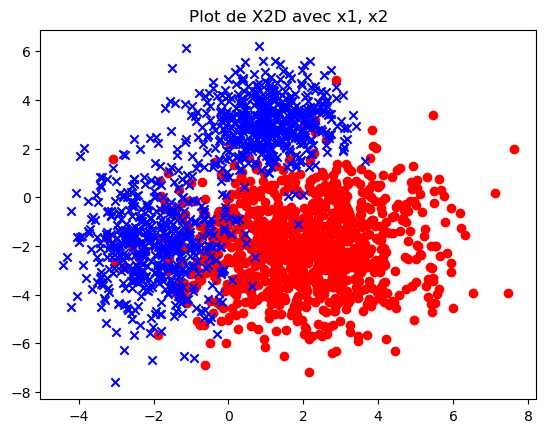

In [8]:
# Afficher les donnees en 2 dimensions
ut.plot2DSet(X2D, Y2D)
ut.plt.title(f"Plot de X2D avec x1, x2")
ut.plt.show()

## Experimentation knn

ClassifierKNN utilise la méthode des k plus proches voisins pour attribuer un label à une observation. Le k-NN est une méthode d'apprentissage supervisé qui cherche à attribuer un label à une observation en se basant sur les k observations les plus proches de l'ensemble d'apprentissage.

Pour trouver la meilleur performance du Classifieur kNN, nous allons faire varier la valeur de k entre 1 et 100 par increment de 2 et evaluer la `accuracy` et les temps d'executions. On a decoupe l'ensemble des donnees `X2D` et `Y2D` en deux datasets, un d'apprentissage et un d'evaluation, avec une proportion de 4:1. On a utilise la fonction crossval_strat pour s'assurer d'avoir un dataset representant toutes les classes possibles. La accuracy represente le taux de accuracy quand le classifieur est teste sur le dataset d'evaluation.

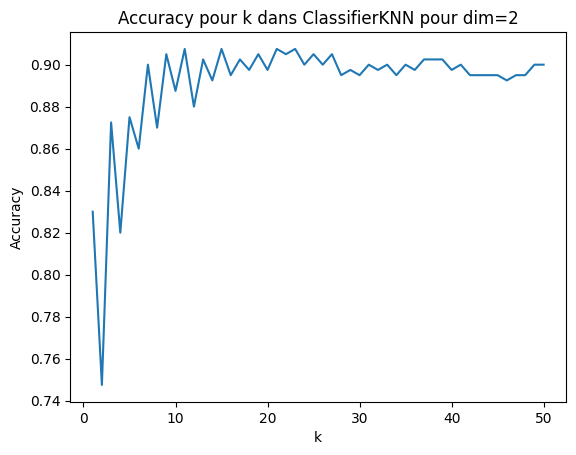

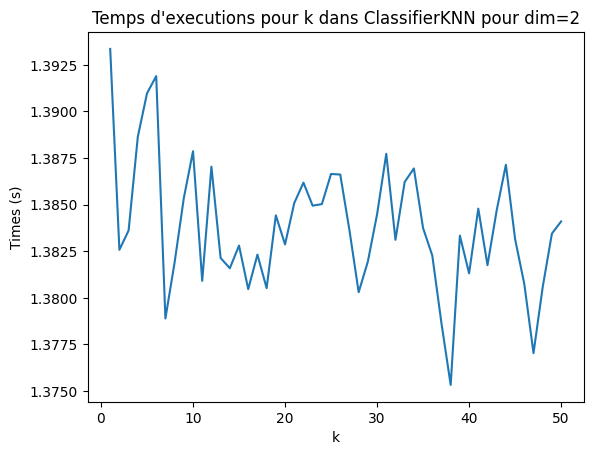

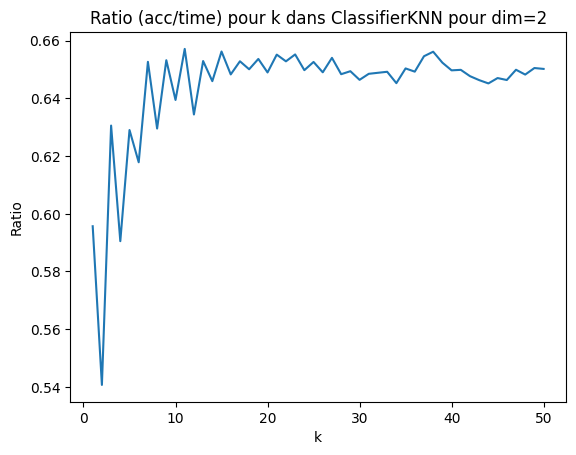

meilleur k: 11, acc: 0.907500, t_exec: 1.380913


In [9]:
np.random.seed(42)
# on stocke les accuracies dans une liste :
accuracies_knn = []
times_knn = []
ratios_knn = []

# seuil max des valeurs de k à regarder:
increment = 1
seuil_k = 51

# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,increment)]

c = classif.ClassifierKNN(2, 1)

Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X2D, Y2D, 5, 0)

#print(Xtest,Ytest)
c.train(Xapp, Yapp)

for k in valeurs_k:
    c.k = k
    tic = time.time()
    acc = c.accuracy(Xtest, Ytest)
    toc = time.time()
    chrono = toc - tic
    
    accuracies_knn.append(acc)
    times_knn.append(chrono)
    ratios_knn.append(acc/chrono)
    #print(f"k={k}\tacc={acc}\ttime={chrono}\tratio:{acc/chrono}")

# plots des accuracies
ut.plot2D(valeurs_k, accuracies_knn, "k", 'Accuracy', "Accuracy pour k dans ClassifierKNN pour dim=2")
ut.plot2D(valeurs_k, times_knn, "k", 'Times (s)', "Temps d'executions pour k dans ClassifierKNN pour dim=2")
ut.plot2D(valeurs_k, ratios_knn, "k", "Ratio", "Ratio (acc/time) pour k dans ClassifierKNN pour dim=2")

# trouver meilleur k
best_acc = max(accuracies_knn)
best_k = valeurs_k[accuracies_knn.index(best_acc)]
best_time = times_knn[accuracies_knn.index(best_acc)]
print(f"meilleur k: {best_k}, acc: {ff(best_acc)}, t_exec: {ff(best_time)}")

L'experimentation montre qu'en faisant varier k de 1 a 50, le temps d'execution varie de peu tandis que la accuracy est a son maximum de 0.9075 a `k=11`. C'est pour cela que nous avons selectionne la valeur de `k=11`.

### Evaluation KNN 2D

On a donc suivi l'experimentation avec une validation croisee en 10 pour obtenir la performance d'apprentissage du `ClassifierKNN`.

Le test consiste a separer le jeu de donnees en deux parties `N` fois: une base d'apprentissage et une base de validation. On s'assure d'evaluer le modele d'apprentissage sur `N` ensembles de validation representant les differentes partitions du jeu de donnees.

Ceci permet d'evaluer la generalite des parametres d'apprentissage.
On a mesure le temps d'apprentissage et de classification pendant le test.

Accuracy : 0.922500
Variance : 0.020279
Temps d'entrainement total: 7.800787


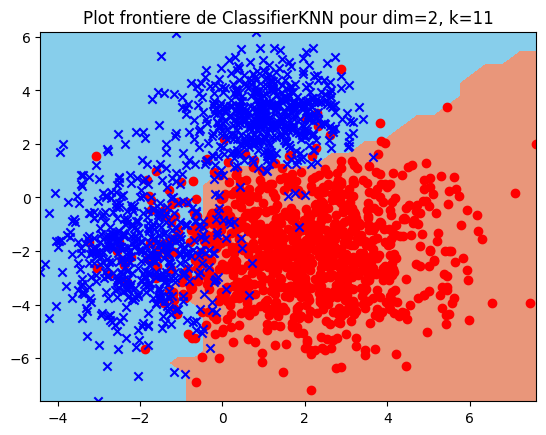

In [10]:
# Reinitionalisation du KNN pour evaluation
np.random.seed(42)
acc = []
classifierKNN = classif.ClassifierKNN(2, best_k)
nb_iter = 10

time_knn_validation = 0

for i in range(nb_iter):
    data_train, label_train, data_test, label_test = ut.crossval_strat(X2D,Y2D,nb_iter,i)
    
    tic = time.time()
    classifierKNN.train(data_train, label_train)
    acc.append(classifierKNN.accuracy(data_test, label_test))
    toc = time.time()
    
    time_knn_validation += toc-tic
    
# affocher resultats
(acc_mean,acc_ecartType) = ut.analyse_perfs(acc)
print(f"Accuracy : {ff(acc_mean)}")
print(f"Variance : {ff(acc_ecartType)}")
print(f"Temps d'entrainement total: {ff(time_knn_validation)}")

# plot meilleur classificatino avec KNN
ut.plot_frontiere(X2D, Y2D, classifierKNN)
ut.plt.title(f"Plot frontiere de ClassifierKNN pour dim=2, k={best_k}")
ut.plot2DSet(X2D, Y2D)

### Conclusion KNN 2D
Avec le test de validation croisee sur `ClassifierKNN` avec `k=11`, on obtient une accuracy moyenne de `0.9225`.
On retient ce resultat.

## Experimentation Perceptron 2D

Le Perceptron est un algorithme d'apprentissage supervise qui classifie des donnees n-dimensionnelles en deux categories. L'algorithme consiste a evaluer une base d'apprentissage en associant a chaque exemple une prediction (-1, 1) a travers une combinaison lineaire des poids internes.

La classe prend en entrée la dimension de la description des exemples (input_dimension), le taux d'apprentissage (learning_rate) et le mode d'initialisation de w (init).

Dans notre implementation, on peut initialiser le `classifierPerceptron` avec soit des poids a 0 (represente par `True`), soit par des poids aleatoires (represente par `False`).

A chaque etape d'entrainement, si la prediction est correcte, les poids ne changent pas. Dans le cas contraire, les poids internes `w` sont ajustes par un facteur de `learning_rate`.

On a decide d'evaluer la performance de ce classifieur en faisant varier le learning rate de 0.001 a 0.1 par increment de 0.001.

In [11]:
# TODO: delete this box
Xshape = X2D.shape
print(X2D.shape[1])
print(np.empty([0, Xshape[1]]))

2
[]


best poids_0: False
best learning rate : 0.041000
best accuracy : 0.930000
Le temps utilise pour trouver les meilleurs learning rate et Initialisation aléatoire : 74.54648947715759


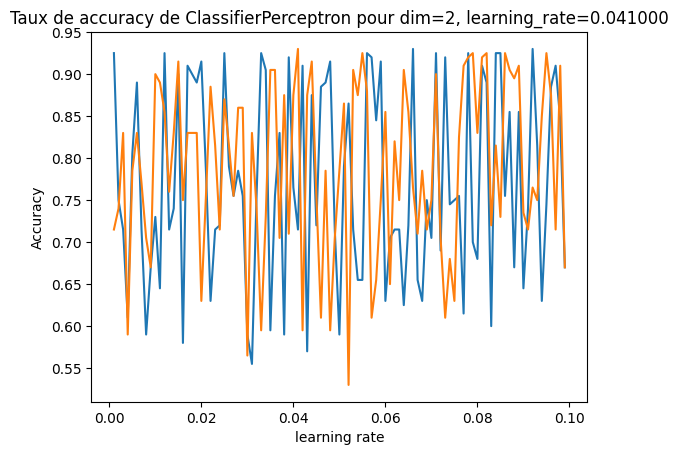

In [12]:
np.random.seed(42)
# on stocke les accuracies dans une liste :
acc_F = []
acc_T = []

# Trouver best Initialisation aléatoire et Learning rate
learning_rate = [eps*0.001 for eps in range(1,100,1)]
nb_iter = 10

data_train, label_train, data_test, label_test = ut.crossval_strat(X2D, Y2D, nb_iter, 1)
tic = time.time()
for i in learning_rate:
    #Init True
    perceptron1 = classif.ClassifierPerceptron(2, i, True)
    perceptron1.train(data_train, label_train)
    acc_T.append(perceptron1.accuracy(data_test, label_test))
    #Init False
    perceptron2 = classif.ClassifierPerceptron(2, i, False)
    perceptron2.train(data_train, label_train)
    acc_F.append(perceptron2.accuracy(data_test, label_test))

# Trouver best accuracy 
best_acc_T = max(acc_T)
best_acc_F = max(acc_F)

best_percep_learning_rate = 0
best_percep_poids_0 = True
# Comparer 
if best_acc_T > best_acc_F:
    best_percep_poids_0 = True
    index = acc_T.index(best_acc_T)
    best_percep_learning_rate = learning_rate[index]
    print("best poids_0: True")
    print("best learning rate : ", best_percep_learning_rate)
    print("best accuracy : ", best_acc_T)
else:
    best_percep_poids_0 = False
    index = acc_F.index(best_acc_F)
    best_percep_learning_rate = learning_rate[index]
    print("best poids_0: False")
    print(f"best learning rate : {ff(best_percep_learning_rate)}")
    print(f"best accuracy : {ff(best_acc_F)}")
toc = time.time()
# Le temps pour trouver best learning rate et Init
times_percept = toc - tic

print("Le temps utilise pour trouver les meilleurs learning rate et Initialisation aléatoire :" , times_percept)
ut.plt.plot(learning_rate, acc_T)
ut.plt.plot(learning_rate, acc_F)
ut.plt.ylabel('Accuracy')
ut.plt.xlabel("learning rate")
ut.plt.title(f"Taux de accuracy de ClassifierPerceptron pour dim=2, learning_rate={ff(best_percep_learning_rate)}")
ut.plt.show()

Les resultats indiques que le meilleur learning rate est de `0.041`, pour une accuracy de `0.93`. Egalement le `ClassifierPerceptron` a une meilleur performance avec les poids initialises avec des valeurs aleatoires.

### Evaluation Perceptron 2D

On realise ensuite une validation croisee en 10 pour obtenir la performance d'apprentissage de maniere equitable.

Accuracy moyenne: 0.808500
Ecart type: 0.141121
time_percep_validation croisée en 10 : 3.837132


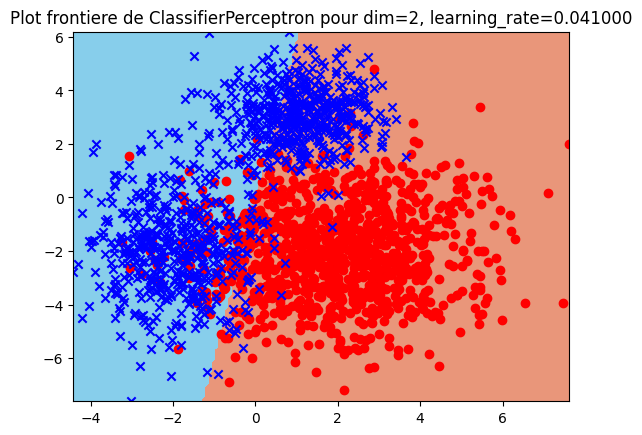

In [13]:
np.random.seed(42)
# initialiser perceptron avec les meilleurs valeurs obtenus precedemment
acc_percep = []
perceptron1 = classif.ClassifierPerceptron(2, best_percep_learning_rate, best_percep_poids_0)

time_percep_validation = 0

#réaliser une validation croisée en 10 
for i in range(nb_iter):
    data_train, label_train, data_test, label_test = ut.crossval_strat(X2D,Y2D,nb_iter,i)
    
    tic = time.time()
    perceptron1.train(data_train, label_train)
    acc_percep.append(perceptron1.accuracy(data_test,label_test))
    toc = time.time()
    
    time_percep_validation += toc-tic
    
# plot resultats
ut.plot_frontiere(X2D,Y2D,perceptron1,step=150)
ut.plt.title(f"Plot frontiere de ClassifierPerceptron pour dim=2, learning_rate={ff(best_percep_learning_rate)}")
ut.plot2DSet(X2D,Y2D)

# print resultats
(acc_percep_mean,acc_percep_ecartType) = ut.analyse_perfs(acc_percep)
print(f"Accuracy moyenne: {ff(acc_percep_mean)}")
print(f"Ecart type: {ff(acc_percep_ecartType)}")
print(f"time_percep_validation croisée en 10 : {ff(time_percep_validation)}")

Apres la validation croisee en 10, on s'appercoit que `ClassifierPerceptron` n'obtient que une accuracy de `0.808` avec un grand ecart-type de `0.14`.

Nb iterations:  254


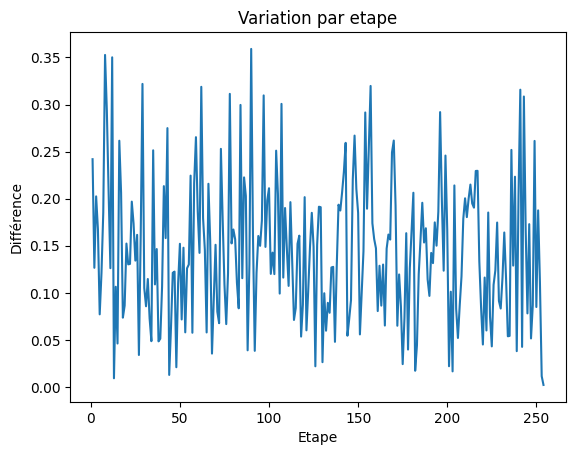

In [14]:
np.random.seed(43)
#Convergence
# Evaluer ClassifierPerceptron et recuperer les variations
data_train, label_train, data_test, label_test = ut.crossval_strat(X2D,Y2D,nb_iter,1)
perceptron1 = classif.ClassifierPerceptron(2, best_percep_learning_rate, best_percep_poids_0)
variations = perceptron1.train(data_train, label_train, nb_max=1000, seuil=0.005)
print("Nb iterations: ", len(variations))
# Traçage de la courbe des variations
ut.plot2D(range(1,len(variations)+1), variations, "Etape", "Différence", "Variation par etape")  

### Conclusion Perceptron 2D
Utilisant un learning rate de `0.041`, le perceptron converge au bout de `254` iterations.
La meilleur accuracy obtenue en validation croisee est de `0.801`.

On retient ce resultat pour le comparer a perceptron biais.

## Experimentation Perceptron biais

On va ensuite evaluer l'algorithme d'apprentissage du perceptron biais. Cet algorithme est tres similaire a celui du Perceptron, la seule difference etant que Perceptron Biais rajoute un terme de biais au poids. Ceci peut permettre une meilleur flexibilite lors de l'apprentissage.

On commence comme avec le `Perceptron` en cherchant le meilleur learning rate. On va faire varier le learning rate entre 0.0001 et 0.1 par increment de 0.0001.

best poids_0: False
best learning rate : 0.009700
best accuracy : 0.93


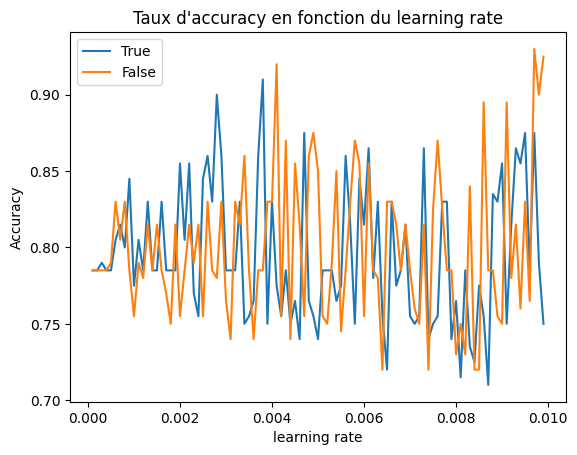

In [15]:
np.random.seed(42)
acc_biais_F = []
acc_biais_T = []
learning_rate = [eps*0.0001 for eps in range(1,100,1)]

# preparer ensemble d'entrainement
data_train, label_train, data_test, label_test = ut.crossval_strat(X2D, Y2D, 10,1)
tic = time.time()

# Trouver best Initialisation aléatoire et Learning rate
for i in learning_rate:
    perceptron1 = classif.ClassifierPerceptronBiais(2, i, True)
    perceptron1.train(data_train, label_train)
    acc_biais_T.append(perceptron1.accuracy(data_test, label_test))
    
    perceptron2 = classif.ClassifierPerceptronBiais(2, i, False)
    perceptron2.train(data_train, label_train)
    acc_biais_F.append(perceptron2.accuracy(data_test, label_test))

# recuperer le max et ses statistiques
best_biais_acc_T = max(acc_biais_T)
best_biais_acc_F = max(acc_biais_F)

best_biais_poids_0 = best_biais_acc_T > best_biais_acc_F
best_biais_index = acc_biais_T.index(best_biais_acc_T) if best_biais_poids_0 else acc_biais_F.index(best_biais_acc_F)
    
best_biais_learning_rate = learning_rate[best_biais_index]
best_biais_acc = best_biais_acc_T if best_biais_poids_0 else best_biais_acc_F

print(f"best poids_0: {best_biais_poids_0}")
print(f"best learning rate : {ff(best_biais_learning_rate)}")
print(f"best accuracy : {best_biais_acc}")
    
toc = time.time()
time_percepBiais = toc - tic

ut.plt.plot(learning_rate, acc_biais_T)
ut.plt.plot(learning_rate, acc_biais_F)
ut.plt.ylabel('Accuracy')
ut.plt.xlabel("learning rate")
ut.plt.legend(["True", "False"])
ut.plt.title("Taux d'accuracy en fonction du learning rate")
ut.plt.show()

On obtient alors un learning rate optimal de `0.0097` pour une accuracy de `0.93` et les poids initialises aleatoirement.

### Evaluation Perceptron Biais 2D

Avec ces valeurs la, on realise une validation croisee en 10 pour verifier la performance d'apprentissage du `ClassifierPerceptronBiais`.

Accuracy moyenne: 0.826222
Ecart type: 0.019703
time_percpBiais_validation : 5.088154


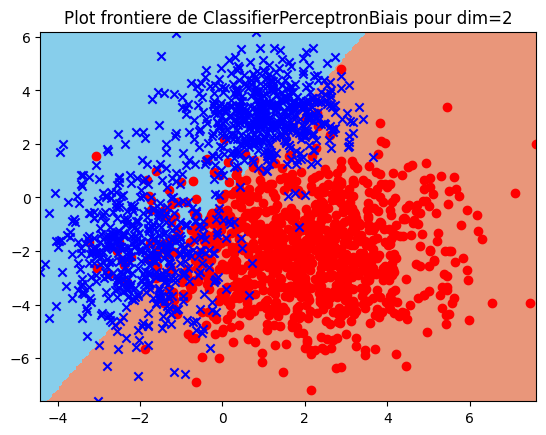

In [16]:
np.random.seed(42)
# avec les valeurs optimals
acc_biais = []
nb_iter = 10
perceptron1 = classif.ClassifierPerceptronBiais(2, best_biais_learning_rate, best_biais_poids_0)

#réaliser une validation croisée en 10 
time_percepBiais_validation = 0

for i in range(nb_iter):
    data_train, label_train, data_test, label_test = ut.crossval_strat(X2D,Y2D,nb_iter,i)
    
    tic = time.time()
    perceptron1.train(data_train, label_train)
    acc_biais.append(perceptron1.accuracy(data_train,label_train))
    toc = time.time()
    
    time_percepBiais_validation += toc-tic

# afficher resultats
#print(acc_biais)
(acc_mean,acc_ecartType) = ut.analyse_perfs(acc_biais)
print(f"Accuracy moyenne: {ff(acc_mean)}")
print(f"Ecart type: {ff(acc_ecartType)}")
print(f"time_percpBiais_validation : {ff(time_percepBiais_validation)}")

# plots 
ut.plot_frontiere(X2D,Y2D,perceptron1,step=150)
ut.plt.title("Plot frontiere de ClassifierPerceptronBiais pour dim=2")
ut.plot2DSet(X2D,Y2D)

On retient donc une accuracy moyenne de `0.826` et un temps de validation de `3.634` secondes.

On continue en verifiant le nombre d'etapes jusqu'a convergence.

Nb iterations:  42


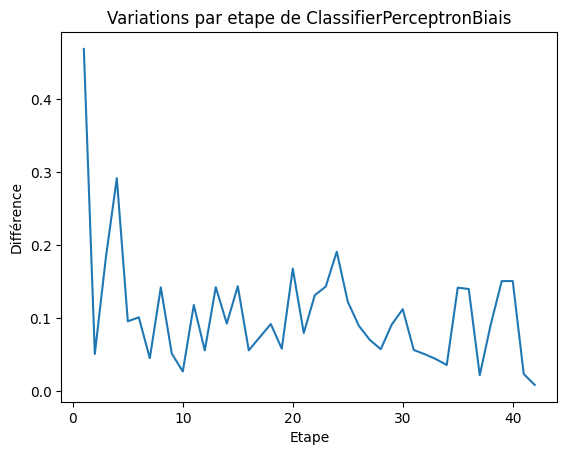

In [17]:
np.random.seed(44)
#Convergence
data_train, label_train, data_test, label_test = ut.crossval_strat(X2D,Y2D,nb_iter,1)
perceptron1 = classif.ClassifierPerceptronBiais(2, best_biais_learning_rate, best_biais_poids_0)
les_variations = perceptron1.train(data_train, label_train,nb_max=1000, seuil=0.01)
print("Nb iterations: ", len(les_variations))

# Traçage de la courbe des variations
ut.plot2D(range(1,len(les_variations)+1),les_variations, "Etape", 'Différence', "Variations par etape de ClassifierPerceptronBiais")  

### Conclusion Perceptron Biais 2D

Le perceptron biais fini par converger au bout de seulement 42 iterations (compare au resultat du Perceptron 2D) qui n'atteinds que la convergence au bout de 291 iterations. Ce resultat est attendu car le Perceptron Biais 

In [18]:
print(f"{time_knn_validation}")
print(f"{time_percep_validation}")
print(f"{time_percepBiais_validation}")

7.800786972045898
3.8371317386627197
5.088154315948486


## Conclusion 2D

Classifieur | Accuracy | Temps | Ratio
---|---|---|---
KNN | 0.9225 | 7.594 | X
Perceptron | 0.801 | 3.76 | X
PercepBiais | 0.826 | 3.634 | X

Avec le cas du jeu de donnees en 2 dimensions, on s'appercoit immediatement d'une relation entre la accuracy obtenue et le temps de validation: plus le temps de calcul est eleve, plus la accuracy augemente.
Si on se base sur la accuracy seule, on se retrouve avec `ClassifierKNN` pour `k=11` comme etant le meilleur classifieur. Le `classifierKNN` semble etre la methode methode pour generaliser dans ce cas la.


# 5D

On va maintenant reproduire les methodes d'experimentation et d'analyse utilisant le jeu de donnees 5D sur les memes classes `ClassifierKNN`, `ClassifierPerceptron`, et `ClassifierPerceptronBiais`.

Dans toutes les instances, il suffit de remplacer le nombre de dimensions en argument dans l'initialisation des classes pour adapter les methodes d'apprentissage en 5 dimensions.

## Presentation des donnees 5D

Dans le cas des 5 dimensions, on utilise `X5D` comme descriptions et `Y5D` comme labels. On affiche ensuite les plots pour chaque combinaisons de deux variables dans X5D.

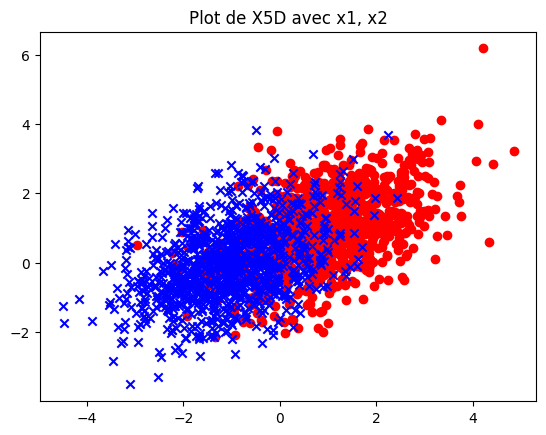

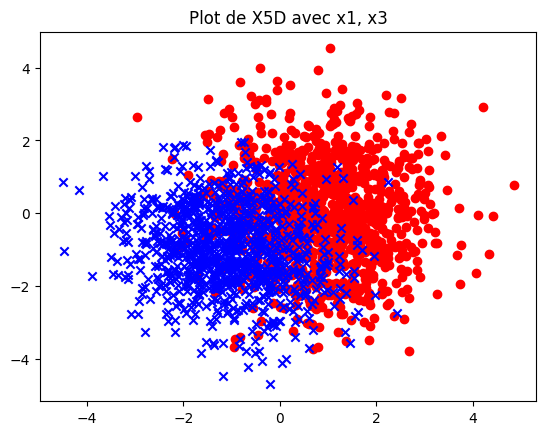

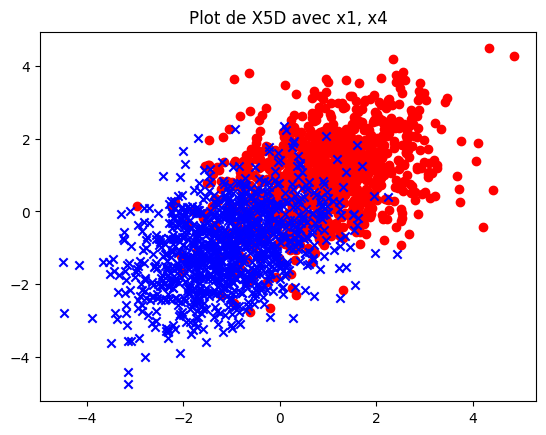

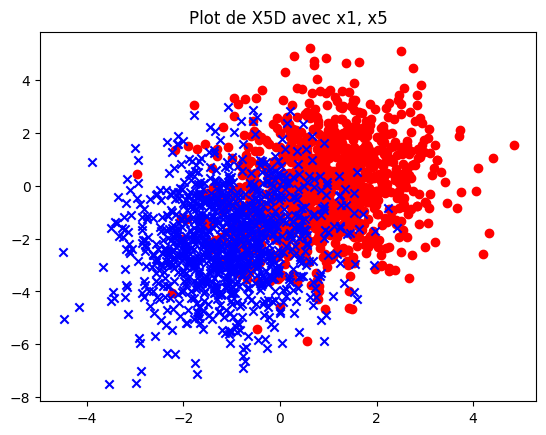

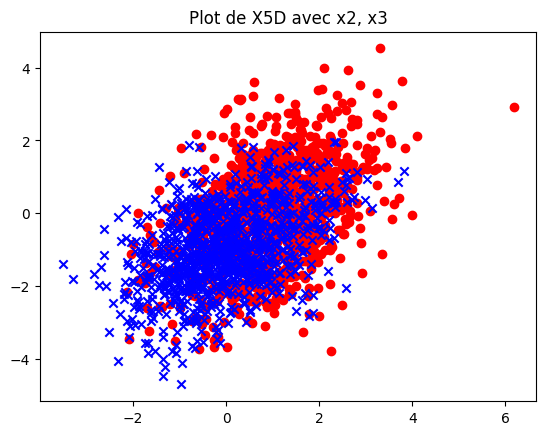

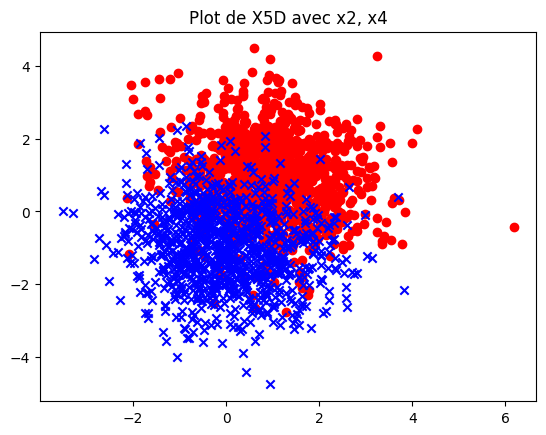

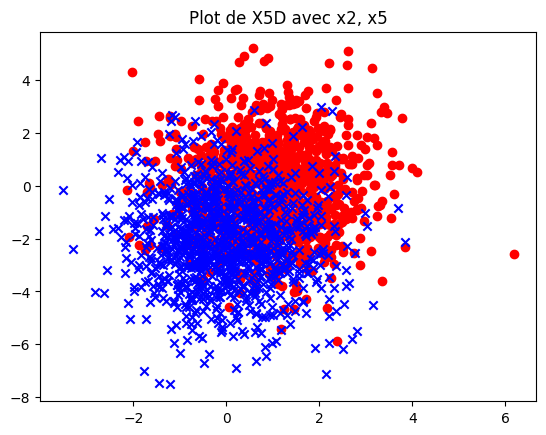

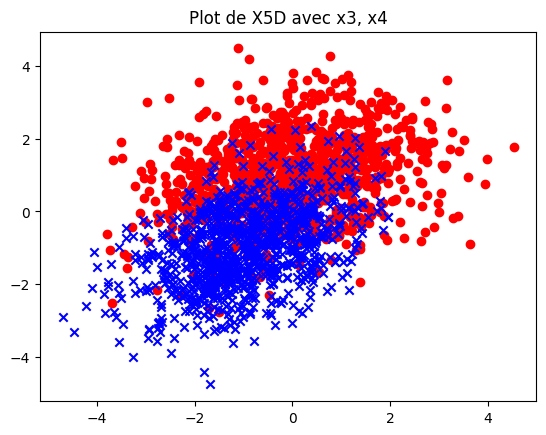

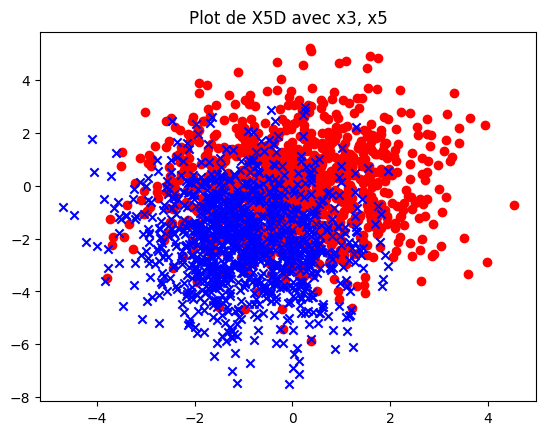

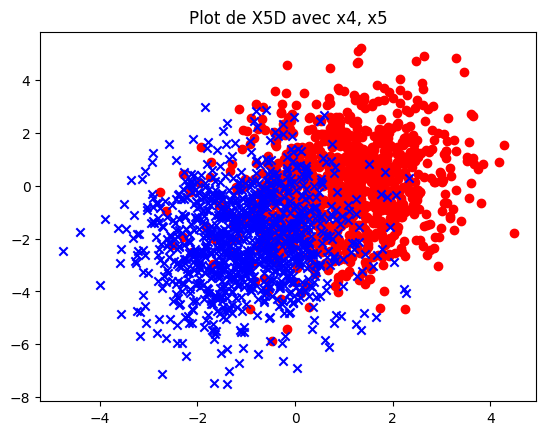

In [19]:
X5D_t = np.transpose(X5D)

# Afficher plots de chaque dimension
for i in range(0, 5):
    for j in range(i+1, 5):
        ut.plot2DSet(np.transpose(ut.zip_x(X5D_t, i, j)), Y5D)
        ut.plt.title(f"Plot de X5D avec x{i+1}, x{j+1}")
        ut.plt.show()

## Experimentation KNN 5D

#TODO: explication KNN 5D comment fonctionne
Le fonctionnement de KNN en 5 dimensions est pareil que KNN en 2 dimensions sauf que la distance est calculee avec la norme en 5 dimensions.

On va reproduire les experimentations realisee auparavant, commencant par determiner la valeur de `k` optimale. 

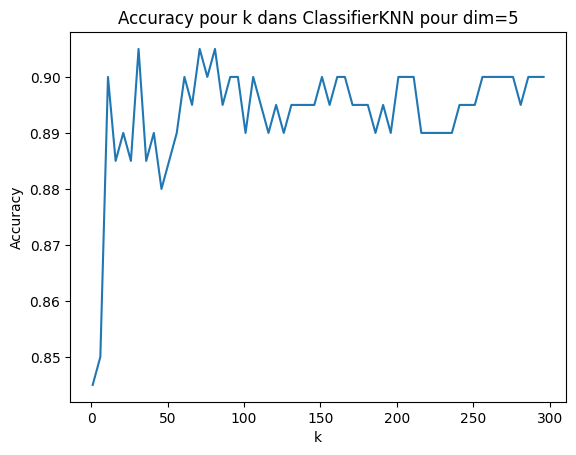

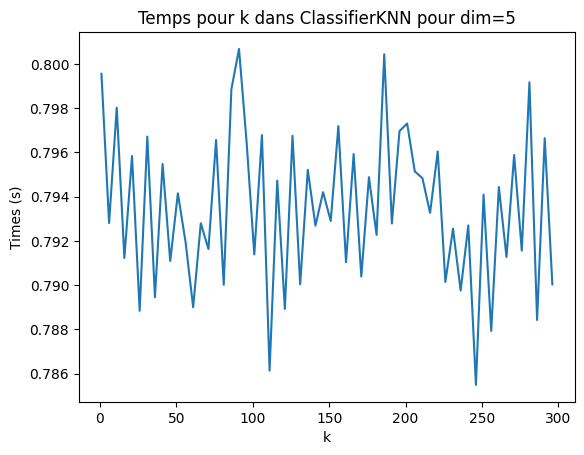

meilleur k: 31, acc: 0.905000, t_exec: 0.796710


In [20]:
np.random.seed(42)
# on stocke les accuracies dans une liste :
accuracies_knn_5d = []
times_knn_5d = []

# seuil max des valeurs de k à regarder:
increment = 5
seuil_k = 300

# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,increment)]

c = classif.ClassifierKNN(5, 1)

Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X5D, Y5D, 10, 1)

#print(Xtest,Ytest)
c.train(Xapp, Yapp)

# parcourir k et trouver la meilleur valeur
for k in valeurs_k:
    c.k = k
    tic = time.time()
    acc = c.accuracy(Xtest, Ytest)
    toc = time.time()
    chrono = toc - tic
    
    accuracies_knn_5d.append(acc)
    times_knn_5d.append(chrono)
    #print(f"k={k}\tacc={acc}\ttime={chrono}")

# afficher resultats
ut.plot2D(valeurs_k, accuracies_knn_5d, "k", "Accuracy", "Accuracy pour k dans ClassifierKNN pour dim=5")  
ut.plot2D(valeurs_k, times_knn_5d, "k", "Times (s)", "Temps pour k dans ClassifierKNN pour dim=5")  
    
# trouver meilleur k
best_acc = max(accuracies_knn_5d)
best_k = valeurs_k[accuracies_knn_5d.index(best_acc)]
best_time = times_knn_5d[accuracies_knn_5d.index(best_acc)]
print(f"meilleur k: {best_k}, acc: {ff(best_acc)}, t_exec: {ff(best_time)}")

On retrouve pour ClassifierKNN en 5 dimensions une valeur de k optimal de `31`, pour une accuracy de `0.905`.

### Evaluation KNN 5D
On continue avec un test de validation croisee en 10 pour obtenir la performance d'apprentissage.

Accuracy moyenne: 0.884
Ecart type: 0.017000
Temps de validation: 7.884512


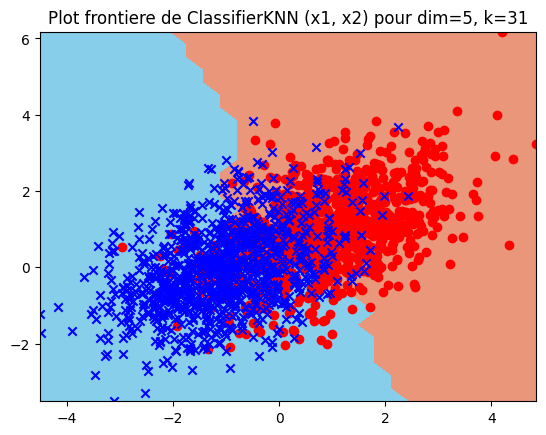

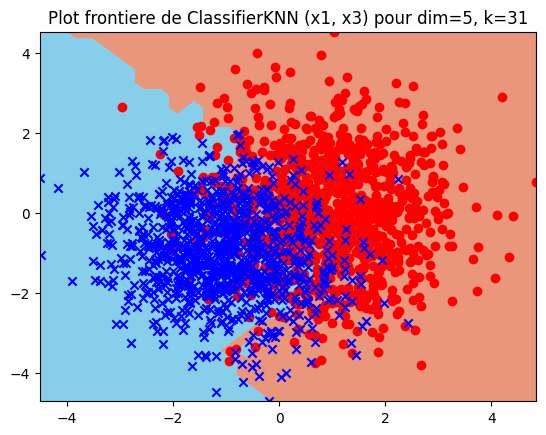

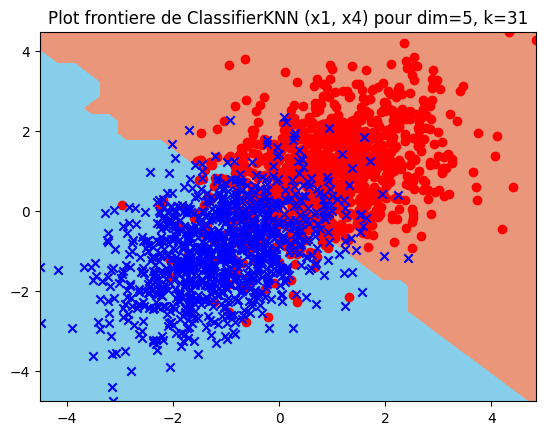

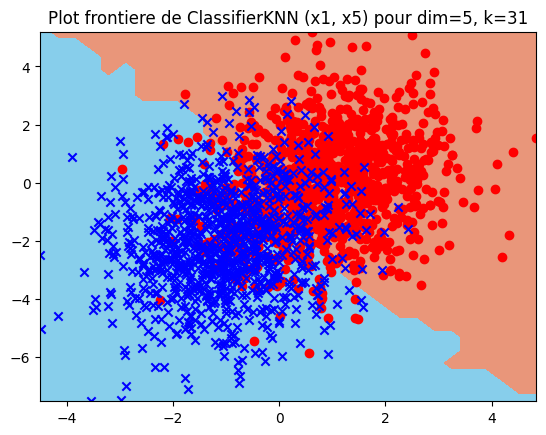

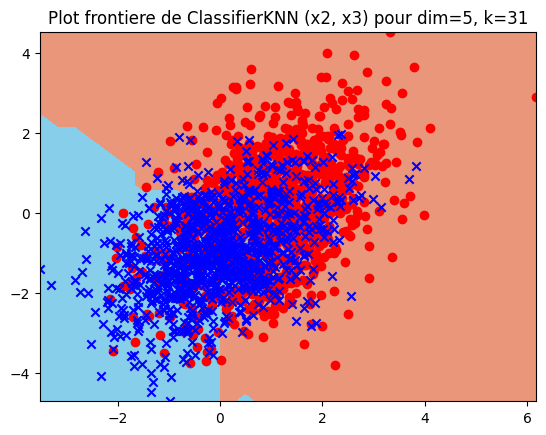

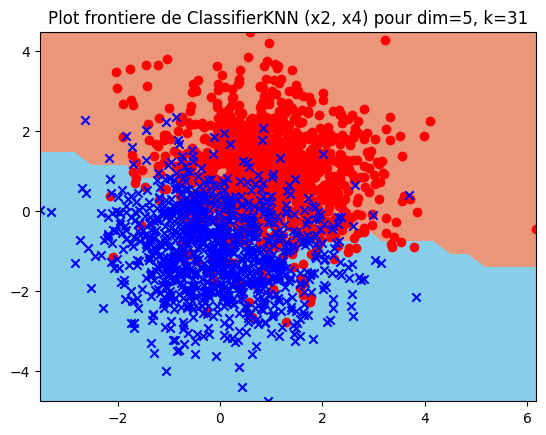

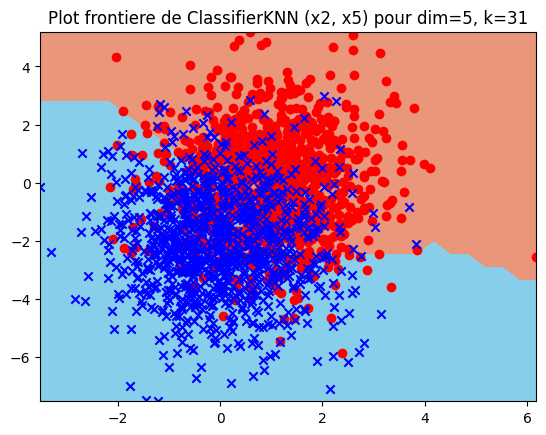

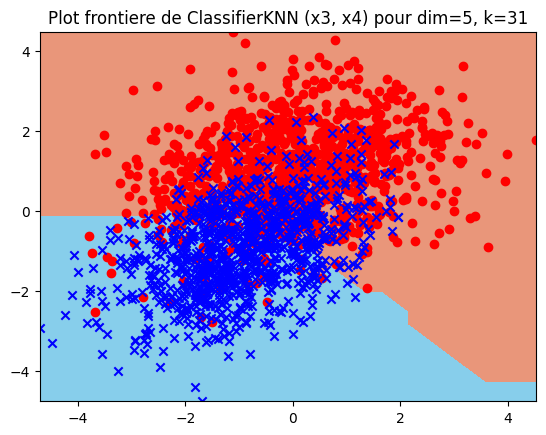

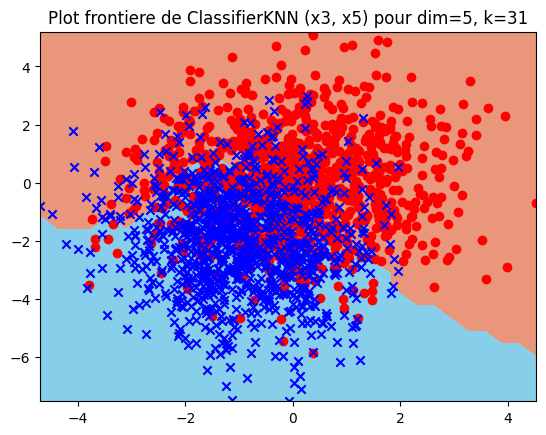

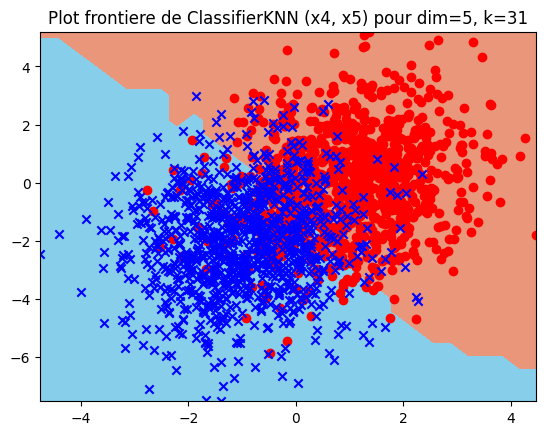

In [21]:
# init classifierKNN avec k optimal
classifierKNN = classif.ClassifierKNN(5, best_k)
acc_knn_5d = []
nb_iter = 10
temps_knn_validation_5d = 0

# realiser test de validation croisee en 10
for i in range(nb_iter):
    data_train, label_train, data_test, label_test = ut.crossval_strat(X5D, Y5D, nb_iter, i)
    
    tic = time.time()
    classifierKNN.train(data_train, label_train)
    acc_knn_5d.append(classifierKNN.accuracy(data_test, label_test))
    toc = time.time()
    
    temps_knn_validation_5d += toc - tic

# analyser statistiques sur l'entrainement
(acc_knn_mean_5d,acc_knn_ecartType_5d) = ut.analyse_perfs(acc_knn_5d)
print(f"Accuracy moyenne: {acc_knn_mean_5d}")
print(f"Ecart type: {ff(acc_knn_ecartType_5d)}")
print(f"Temps de validation: {ff(temps_knn_validation_5d)}")

X5D_t = np.transpose(X5D)

# afficher les 10 combinaisons possibles de variables de x
for i in range(0, 5):
    for j in range(i+1, 5):
        #print(f"Plot x{i+1}, x{j+1}")
        #ut.plt.legend([f"x{i+1}", f"x{j+1}"])
        ut.plot_frontiere_ND(X5D, Y5D, classifierKNN, 5, i, j, 30)
        ut.plt.title(f"Plot frontiere de ClassifierKNN (x{i+1}, x{j+1}) pour dim=5, k={best_k}")
        ut.plot2DSet(np.transpose(ut.zip_x(X5D_t, i, j)), Y5D)
        ut.plt.show()

### Conclusion KNN 5D
Finalement, utilisant le classifieur KNN de 5 dimensions avec `k=31` pour la validation croisee, on fini avec une accuracy moyenne de `0.884`. On remarque que `KNN` en 5D est moins bon a generaliser que le `ClassifierKNN`. On retient ce resultat pour le comparer avec les autres classifieurs 5D.

## Experimentation Perceptron 5D

La procedure d'experimentation pour le Perceptron 5D est tres similaire a celle du Perceptron 2D. La seule difference etant que l'on traite la base d'apprentissage en 5 dimensions a la place des 2 dimensions.

Dans notre implementation, cela veut dire qu'on initialise `ClassifierPerceptron` avec `input_dimension=5`. Notre perceptron a donc 5 poids internes.

best poids_0: True
best learning rate :  0.0063
best accuracy :  0.9025
Le temps utilise pour trouver les meuilleurs learning rate et Initialisation aléatoire : 60.99368977546692


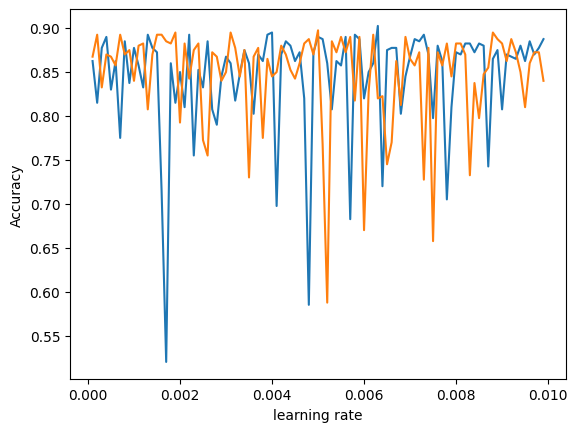

In [22]:
np.random.seed(42)
# on stocke les accuracies dans les listes :
acc_F_5d = []
acc_T_5d = []

# Trouver best Initialisation aléatoire et Learning rate
learning_rate = [eps*0.0001 for eps in range(1, 100, 1)]
nb_iter = 10

data_train, label_train, data_test, label_test = ut.crossval_strat(X5D, Y5D, 5,1)

tic = time.time()

# Trouver best Initialisation aléatoire et Learning rate
for i in learning_rate:
    #Init True
    perceptron1 = classif.ClassifierPerceptron(5, i, True)
    perceptron1.train(data_train, label_train)
    acc_T_5d.append(perceptron1.accuracy(data_test, label_test))
    #Init False
    perceptron2 = classif.ClassifierPerceptron(5, i, False)
    perceptron2.train(data_train, label_train)
    acc_F_5d.append(perceptron2.accuracy(data_test, label_test))

# Trouver best accuracy 
best_percep_acc_T_5d = max(acc_T_5d)
best_percep_acc_F_5d = max(acc_F_5d)
best_percep_learning_rate_5d = 0
best_percep_poids_0_5d = True

# Comparer 
if best_percep_acc_T_5d > best_percep_acc_F_5d:
    best_percep_poids_0_5d = True
    index = acc_T_5d.index(best_percep_acc_T_5d)
    best_percep_learning_rate_5d = learning_rate[index]
    print("best poids_0: True")
    print("best learning rate : ", best_percep_learning_rate_5d)
    print("best accuracy : ", best_percep_acc_T_5d)
else:
    best_percep_poids_0_5d = False
    index = acc_F_5d.index(best_percep_acc_F_5d)
    best_percep_learning_rate_5d = learning_rate[index]
    print("best poids_0: False")
    print("best learning rate : ", best_percep_learning_rate_5d)
    print("best accuracy : ", best_percep_acc_F_5d)
toc = time.time()
# Le temps pour trouver best learning rate et Init
times_percept_5d = toc - tic

print("Le temps utilise pour trouver les meuilleurs learning rate et Initialisation aléatoire :" , times_percept_5d)
ut.plt.plot(learning_rate, acc_T_5d)
ut.plt.plot(learning_rate, acc_F_5d)
ut.plt.ylabel('Accuracy')
ut.plt.xlabel("learning rate")
ut.plt.show()

On retrouve ici que le meilleur learning rate retrouve pour le Perceptron 5D est de `0.0063`.

### Evaluation Perceptron 5D

On continue avec une validation croisee en 10.

On affiche ensuite les plots frontieres des predictions du meilleur parametre de `learning_rate` projetee en 2 dimensions pour chaque paire de variables dans X5D.

Les autres valeurs sont initialisees avec la moyenne de chaque variable dans X5D.

Accuracy moyenne: 0.7985
Ecart type: 0.14732701721001482
time_percep_validation croisée en 10 : 3.5974960327148438


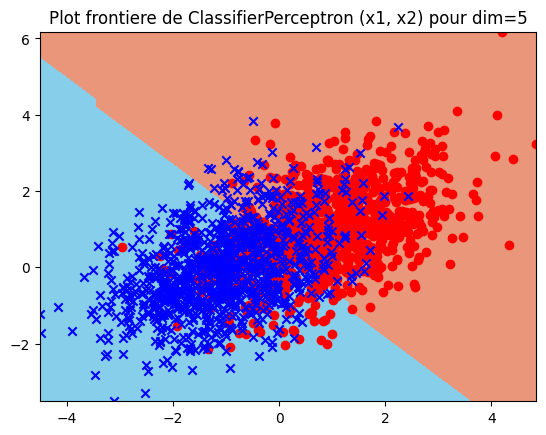

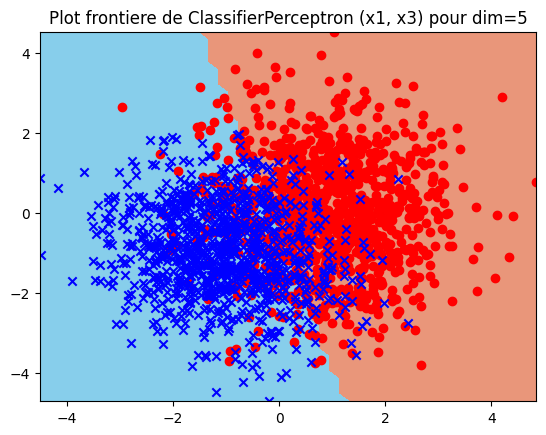

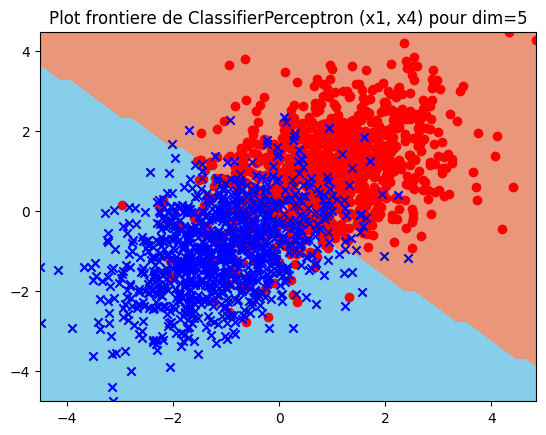

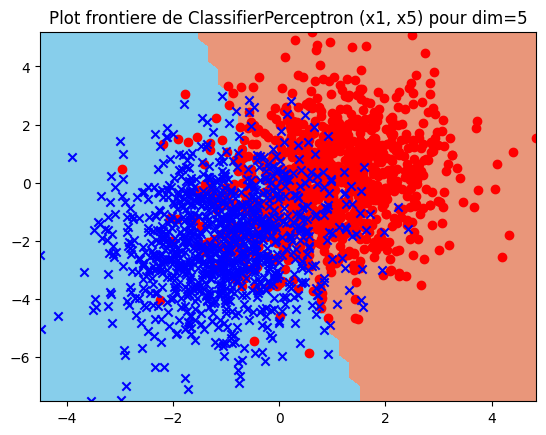

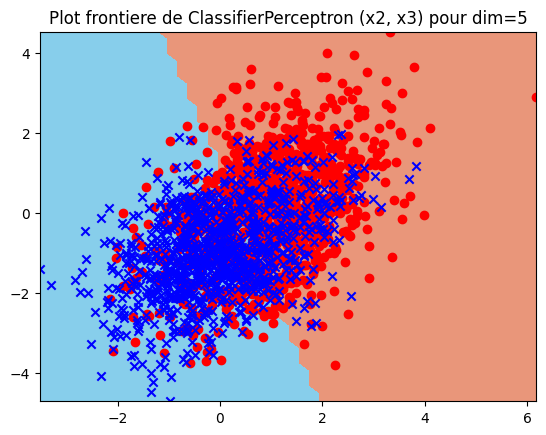

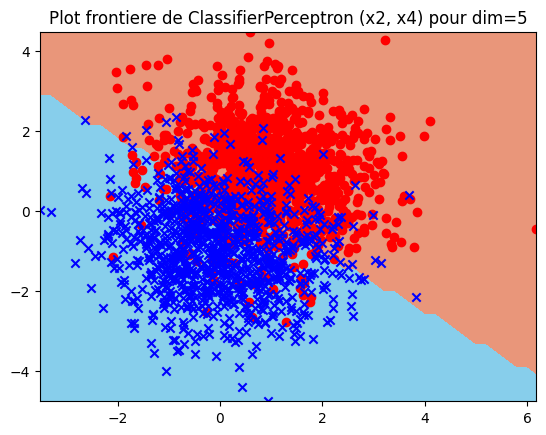

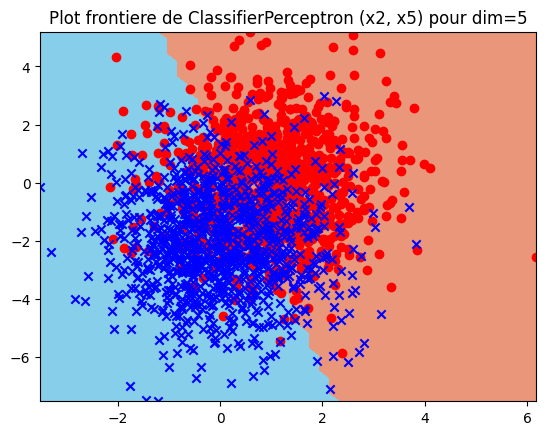

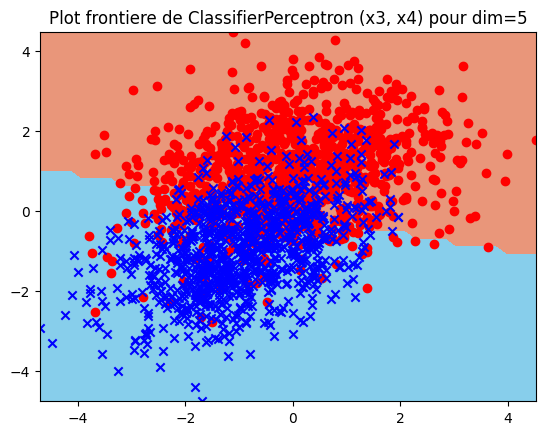

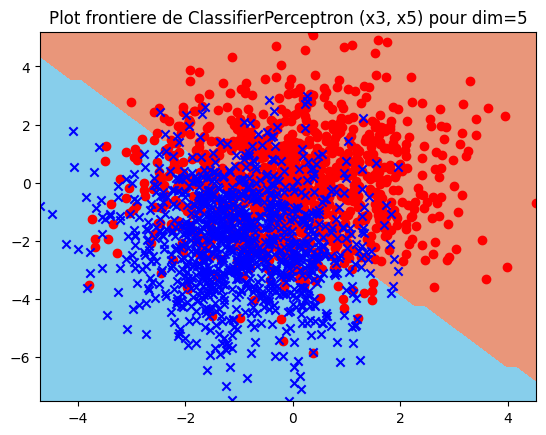

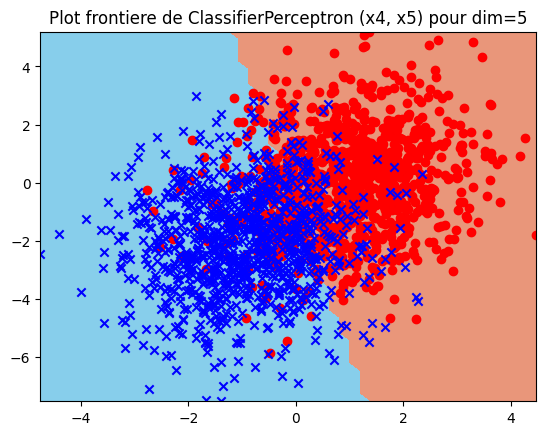

In [23]:
np.random.seed(42)
acc_percep_5d = []
perceptron1 = classif.ClassifierPerceptron(5, best_percep_learning_rate_5d, best_percep_poids_0_5d)

time_percep_validation_5d = 0

#réaliser une validation croisée en 10 
for i in range(nb_iter):
    data_train, label_train, data_test, label_test = ut.crossval_strat(X5D,Y5D,nb_iter, i)
    
    tic = time.time()
    perceptron1.train(data_train, label_train)
    acc_percep_5d.append(perceptron1.accuracy(data_test,label_test))
    toc = time.time()
    time_percep_validation_5d += toc-tic

#print(acc_percep_5d)
(acc_percep_mean_5d,acc_percep_ecartType_5d) = ut.analyse_perfs(acc_percep_5d)
print(f"Accuracy moyenne: {acc_percep_mean_5d}")
print(f"Ecart type: {acc_percep_ecartType_5d}")
print(f"time_percep_validation croisée en 10 : {time_percep_validation_5d}")

# afficher resultats frontiere
for i in range(0, 5):
    for j in range(i+1, 5):
        #print(f"Plot x{i+1}, x{j+1}")
        ut.plot_frontiere_ND(X5D, Y5D, perceptron1, 5, i, j, 50)
        ut.plt.title(f"Plot frontiere de ClassifierPerceptron (x{i+1}, x{j+1}) pour dim=5")
        ut.plot2DSet(np.transpose(ut.zip_x(X5D_t, i, j)), Y5D)
        ut.plt.show()

On retrouve ici une accuracy moyenne de 0.79 sur le test de validation croisee en 10. Le temps d'execution de l'entrainement revient a `4.87`s. On continue, comme en experimentation 2D, avec une analyse des differences lors des etapes d'entrainement de notre perceptron 5D.

Nb iterations:  410


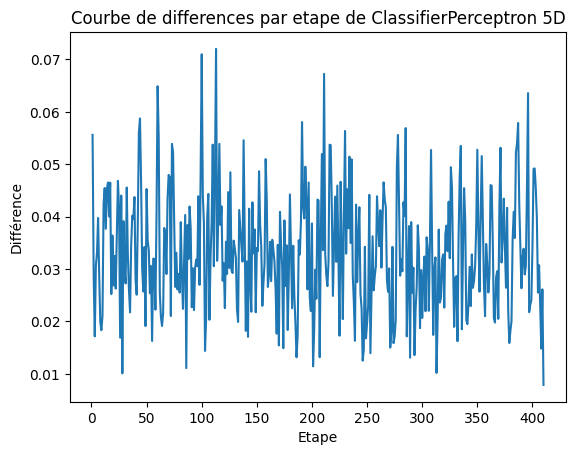

In [24]:
np.random.seed(42)

# Analyse de convergence
data_train, label_train, data_test, label_test = ut.crossval_strat(X5D, Y5D, nb_iter, 1)
perceptron1 = classif.ClassifierPerceptron(5, best_percep_learning_rate_5d, best_percep_poids_0_5d)
les_variations = perceptron1.train(data_train, label_train, nb_max=1000, seuil=0.01)
print("Nb iterations: ", len(les_variations))

# Traçage de la courbe des variations
ut.plot2D(range(1,len(les_variations)+1),les_variations, "Etape", 'Différence', "Courbe de differences par etape de ClassifierPerceptron 5D")  

### Conclusion Perceptron 5D

Avec le perceptron en 5 dimensions, on observe une convergence au bout de 410 iterations. La accuracy moyenne lors de la validation croisee est de `0.79`. On remarque que le temps de convergence est plus long qu'en deux dimensions (410 vs 241).

## Experimentation Perceptron biais 5D

Continuons avec le perceptron en 5 dimensions.

On recherche dans un premier temps la meilleur learning rate.

best poids_0: False
best learning rate : 0.0092
best accuracy : 0.8975


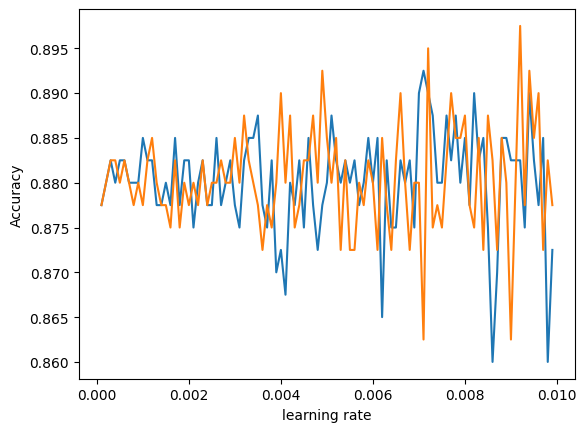

In [25]:
np.random.seed(42)
acc_biais_F_5d = []
acc_biais_T_5d = []
learning_rate = [eps*0.0001 for eps in range(1,100,1)]

# preparer donnees pour analyse
data_train, label_train, data_test, label_test = ut.crossval_strat(X5D, Y5D, 5,1)
tic = time.time()

# parcourir Initialisation aléatoire et Learning rate
for i in learning_rate:
    perceptron1 = classif.ClassifierPerceptronBiais(5, i, True)
    perceptron1.train(data_train, label_train)
    acc_biais_T_5d.append(perceptron1.accuracy(data_test, label_test))
    
    perceptron2 = classif.ClassifierPerceptronBiais(5, i, False)
    perceptron2.train(data_train, label_train)
    acc_biais_F_5d.append(perceptron2.accuracy(data_test, label_test))

# determiner meilleur resultats
best_biais_acc_T_5d = max(acc_biais_T_5d)
best_biais_acc_F_5d = max(acc_biais_F_5d)

best_biais_poids_0_5d = best_biais_acc_T_5d > best_biais_acc_F_5d

best_biais_index_5d = acc_biais_T_5d.index(best_biais_acc_T_5d) if best_biais_poids_0_5d else acc_biais_F_5d.index(best_biais_acc_F_5d)
best_biais_learning_rate_5d = learning_rate[best_biais_index_5d]
best_biais_acc_5d = best_biais_acc_T_5d if best_biais_poids_0_5d else best_biais_acc_F_5d

# les afficher
print(f"best poids_0: {best_biais_poids_0_5d}")
print(f"best learning rate : {best_biais_learning_rate_5d}")
print(f"best accuracy : {best_biais_acc_5d}")
    
toc = time.time()
time_percepBiais_5d = toc - tic

ut.plt.plot(learning_rate, acc_biais_T_5d)
ut.plt.plot(learning_rate, acc_biais_F_5d)
ut.plt.ylabel('Accuracy')
ut.plt.xlabel("learning rate")
ut.plt.show()

On remarque ici une accuracy optimale de `0.8975` pour une learning rate de `0.0092`.

### Evaluation Perptron Biais 5D

On realise encore une fois une validation croisee en 10 afin d'evaluer la performance de ce modele d'apprentissage.

Accuracy moyenne: 0.878000
Ecart type: 0.012490
time_percpBiais_validation : 4.612129
Plot x1, x2


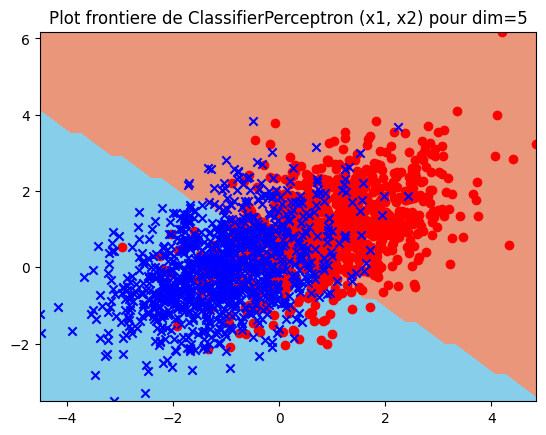

Plot x1, x3


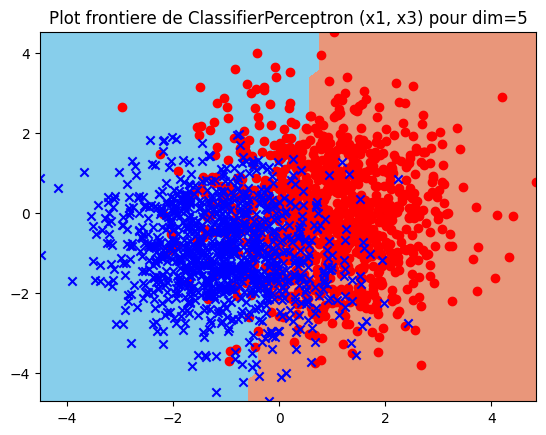

Plot x1, x4


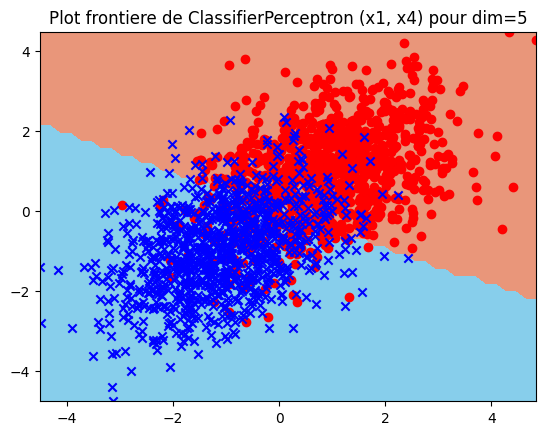

Plot x1, x5


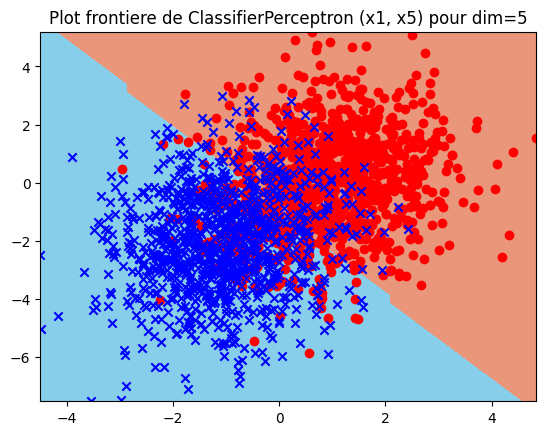

Plot x2, x3


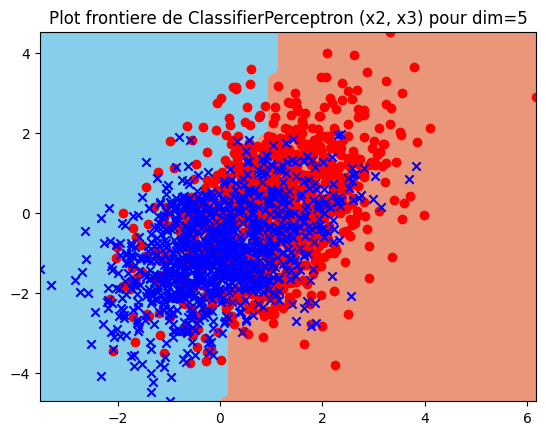

Plot x2, x4


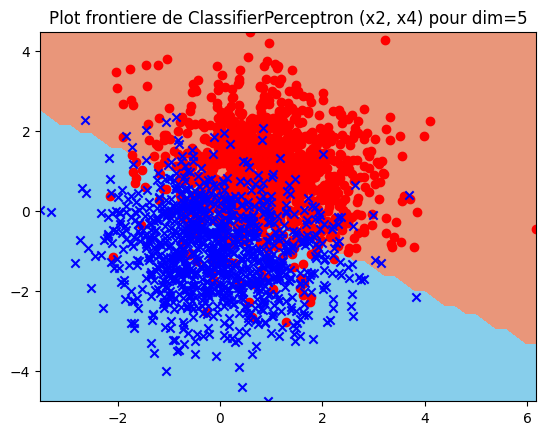

Plot x2, x5


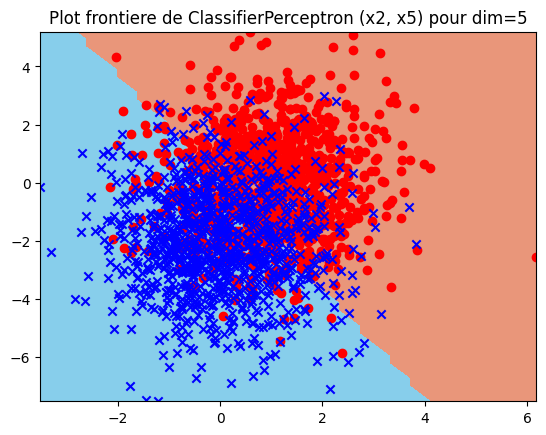

Plot x3, x4


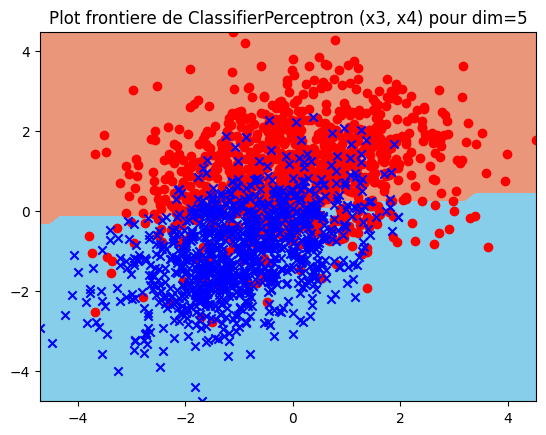

Plot x3, x5


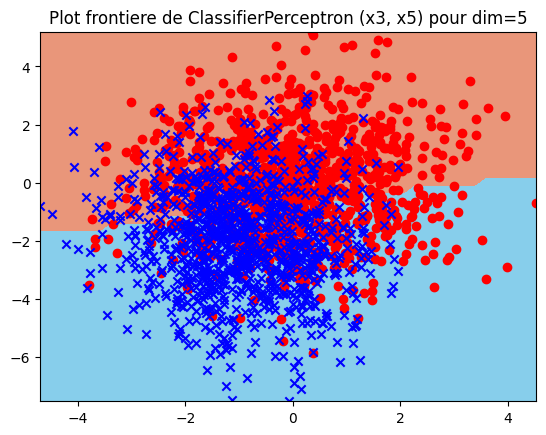

Plot x4, x5


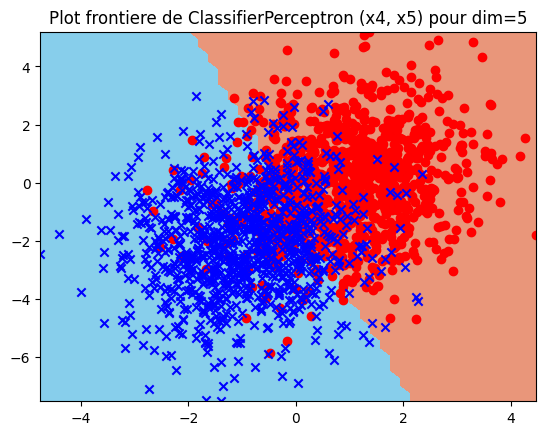

In [26]:
np.random.seed(42)
acc_biais_5d = []
nb_iter = 10
time_percpBiais_5d_validation = 0

#réaliser une validation croisée en 10 
for i in range(nb_iter):
    perceptron1 = classif.ClassifierPerceptronBiais(5, best_biais_learning_rate_5d, best_biais_poids_0_5d)
    data_train, label_train, data_test, label_test = ut.crossval_strat(X5D,Y5D,nb_iter,i)
    
    tic = time.time()
    perceptron1.train(data_train, label_train)
    acc_biais_5d.append(perceptron1.accuracy(data_test,label_test))
    toc = time.time()
    time_percpBiais_5d_validation += toc - tic

(acc_percepBiais_mean_5d,acc_percepBiais_ecartType_5d) = ut.analyse_perfs(acc_biais_5d)
print(f"Accuracy moyenne: {ff(acc_percepBiais_mean_5d)}")
print(f"Ecart type: {ff(acc_percepBiais_ecartType_5d)}")
print(f"time_percpBiais_validation : {ff(time_percpBiais_5d_validation)}")

# afficher plots frontiere 2D
for i in range(0, 5):
    for j in range(i+1, 5):
        print(f"Plot x{i+1}, x{j+1}")
        ut.plot_frontiere_ND(X5D, Y5D, perceptron1, 5, i, j, 50)
        ut.plt.title(f"Plot frontiere de ClassifierPerceptron (x{i+1}, x{j+1}) pour dim=5")
        ut.plot2DSet(np.transpose(ut.zip_x(X5D_t, i, j)), Y5D)
        ut.plt.show()

Nb iterations:  248


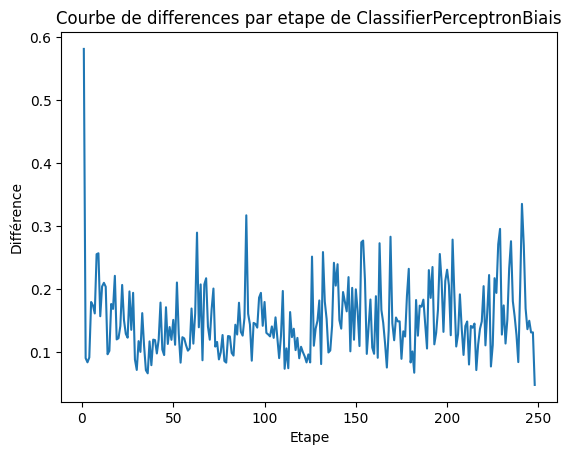

In [27]:
np.random.seed(44)

#Convergence
data_train, label_train, data_test, label_test = ut.crossval_strat(X5D,Y5D,nb_iter,1)
perceptron1 = classif.ClassifierPerceptronBiais(5, best_biais_learning_rate_5d, best_biais_poids_0_5d)
les_variations = perceptron1.train(data_train, label_train,nb_max=1000, seuil=0.05)
print("Nb iterations: ", len(les_variations))
# Traçage de la courbe des variations
ut.plot2D(range(1,len(les_variations)+1),les_variations, "Etape", 'Différence', "Courbe de differences par etape de ClassifierPerceptronBiais")

### Conclusion Perceptron 5D

On retrouve avec le test de validation croisee une accuracy de `0.878`. atteinds ici une convergence seulement au bout de `248` etapes. 

## Conclusion 5D
Comparaison des resultats en 5D:

Classifieur | K | Accuracy | Temps | Ratio
---|---|---|---|---
KNN5D | 31 | 0.884 | 7.8800 | X
Perceptron5D | 0.0063 | 0.7985 | 5.088 | X
PercepBiais5D | 0.0092 | 0.8788 | 4.612 | X

On retrouve en 5D le meme principe de compromis qu'en 2D. Le classifieur KNN est de loin le plus lent mais egalement a le plus haut taux de `accuracy`. Cependant, contrairement au cas 2D, le perceptronBiais5D arrive a un meilleur taux de accuracy que PerceptronBiais2D.

# Conclusion

### Comparaison des classifieurs KNN:

Classifieur | K | Accuracy | Temps | Ratio
---|---|---|---|---
KNN2D | 11 | **0.9225** | **7.800** | X
KNN5D | 31 | 0.884 | 7.8845 | X

En comparant la performance des KNN en 2 et 5 dimensions, on retrouve que KNN2D a une meilleur accuracy et un meilleur temps d'execution lors de la validation croisee en 10. Le temps d'execution peut s'expliquer le fait que le calcul de la distance en 5 dimensions est plus lourd. Egalement, la valeur optimal `k=31`de KNN5D veut dire que le classifieur doit parcourir plus de points.

### Comparaison des classifieurs KNN:

Classifieur | lr | Accuracy | Temps | Ratio
---|---|---|---|---
Perceptron2D | 0.0410 | 0.801 | 3.837 | X
Perceptron5D | 0.0063 | 0.7985 | **3.597** | X
PercepBiais2D | 0.0097 | 0.826 | 5.088 | X
PercepBiais5D | 0.0092 | **0.8788** | 4.612 | X

Les resultats indiques que le meilleur perceptron biais en 5 dimensions obtient la meilleur performance avec une accuracy de `0.8788`. Meme si le perceptron en 5 dimensions a le meilleur temps d'execution, sa accuracy de `0.7985` est la pire parmis toutes les methodes d'appretissage differentes.
